# Lab 7: Spreadsheets and Scraping

In [1]:
# install.packages('readxl')
install.packages('dplyr')
install.packages('tidyr')
install.packages('tidyverse')
# readxl is inside tidyverse package, you have no need to install readxl
# if tidyverse is installed. However, since it is not a core tidyverse,
# you need to load readxl explicitly.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(tidyverse)
library(rvest)
library(readxl)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding




## Spreadsheets
In this section, we will learn how to import spreedsheets, which is covered in [Chapter 22 of R4DS](https://r4ds.hadley.nz/spreadsheets.html)

### Overview
In Chapter 8 Data import, we have learned how about importing data from plain txt files, e.g. `.csv` and `.tsv` files. However, we may also need to analyze data from spreadsheets sometimes. We will introduce tools for importing and writing data data from Excel spreadsheets and Google Sheets.

- Excel
    - Reading spreadsheets
    - Writing to Excel
- Google Sheet

#### Reading Spreadsheets

There are some example excel sheets in `readxl` package, you can find the paths by calling `readxl_example()`

In [3]:
readxl_example() # some example excel sheets in readxl package
geometry_path = readxl_example("geometry.xlsx")
geometry_path # show location of the dataset

[1] "clippy.xls"    "clippy.xlsx"   "datasets.xls"  "datasets.xlsx"
 [5] "deaths.xls"    "deaths.xlsx"   "geometry.xls"  "geometry.xlsx"
 [9] "type-me.xls"   "type-me.xlsx"

[1] "/usr/lib/R/site-library/readxl/extdata/geometry.xlsx"

- `read_xls()` read Excel files with `xls` format.
- `read_xlsx()` read Execel files with `xlsx` format.
- `read_excel()` read Excel files in both format.
- All three functions will read the file in as tibble.


In [4]:
read_excel(geometry_path)
# equivalent to
# read_excel('/usr/local/lib/R/site-library/readxl/extdata/geometry.xlsx')

B3 C3 D3
1 B4 C4 D4
2 B5 C5 D5
3 B6 C6 D6

You can change column name while reading the Excel file.

In [5]:
read_excel(geometry_path, col_names = c("A", "B", "C"))

A  B  C 
1 B3 C3 D3
2 B4 C4 D4
3 B5 C5 D5
4 B6 C6 D6

In [6]:
deaths_path = readxl_example("deaths.xlsx")
head(read_excel(deaths_path))

New names:
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`


Lots of people               ...2       ...3 ...4     ...5         
1 simply cannot resist writing NA         NA   NA       NA           
2 at                           the        top  NA       of           
3 or                           merging    NA   NA       NA           
4 Name                         Profession Age  Has kids Date of birth
5 David Bowie                  musician   69   TRUE     17175        
6 Carrie Fisher                actor      60   TRUE     20749        
  ...6              
1 some notes        
2 their spreadsheets
3 cells             
4 Date of death     
5 42379             
6 42731

The output says there are 5 columns unnamed and named automatically.

In [7]:
head(read_excel(deaths_path,
    col_names = c("Name", "Profession", "Age", "Has kids", "DOB", "DOD")))

Name                         Profession Age Has kids DOB          
1 Lots of people               NA         NA  NA       NA           
2 simply cannot resist writing NA         NA  NA       NA           
3 at                           the        top NA       of           
4 or                           merging    NA  NA       NA           
5 Name                         Profession Age Has kids Date of birth
6 David Bowie                  musician   69  TRUE     17175        
  DOD               
1 NA                
2 some notes        
3 their spreadsheets
4 cells             
5 Date of death     
6 42379

If there are multiple worksheets, you can read a single worksheet from a spreadsheet with `sheet` arguemnt. \\
There are 4 worksheets in `datasets.xlsx`: `iris`, `mtcars`, `chickwts`, and `quakes`

In [8]:
head(read_excel(readxl_example('datasets.xlsx')))
head(read_excel(readxl_example('datasets.xlsx'), sheet = 'iris'))
head(read_excel(readxl_example('datasets.xlsx'), sheet = 'mtcars'))

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         setosa 
2 4.9          3.0         1.4          0.2         setosa 
3 4.7          3.2         1.3          0.2         setosa 
4 4.6          3.1         1.5          0.2         setosa 
5 5.0          3.6         1.4          0.2         setosa 
6 5.4          3.9         1.7          0.4         setosa

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         setosa 
2 4.9          3.0         1.4          0.2         setosa 
3 4.7          3.2         1.3          0.2         setosa 
4 4.6          3.1         1.5          0.2         setosa 
5 5.0          3.6         1.4          0.2         setosa 
6 5.4          3.9         1.7          0.4         setosa

mpg  cyl disp hp  drat wt    qsec  vs am gear carb
1 21.0 6   160  110 3.90 2.620 16.46 0  1  4    4   
2 21.0 6   160  110 3.90 2.875 17.02 0  1  4    4   
3 22.8 4   108   93 3.85 2.320 18.61 1  1  4    1   
4 21.4 6   258  110 3.08 3.215 19.44 1  0  3    1   
5 18.7 8   360  175 3.15 3.440 17.02 0  0  3    2   
6 18.1 6   225  105 2.76 3.460 20.22 1  0  3    1

The `death` dataset looks messy. Let's clean it up! \\
Let's first take a look at the spreadsheet view of `geom_death.xlsx`.

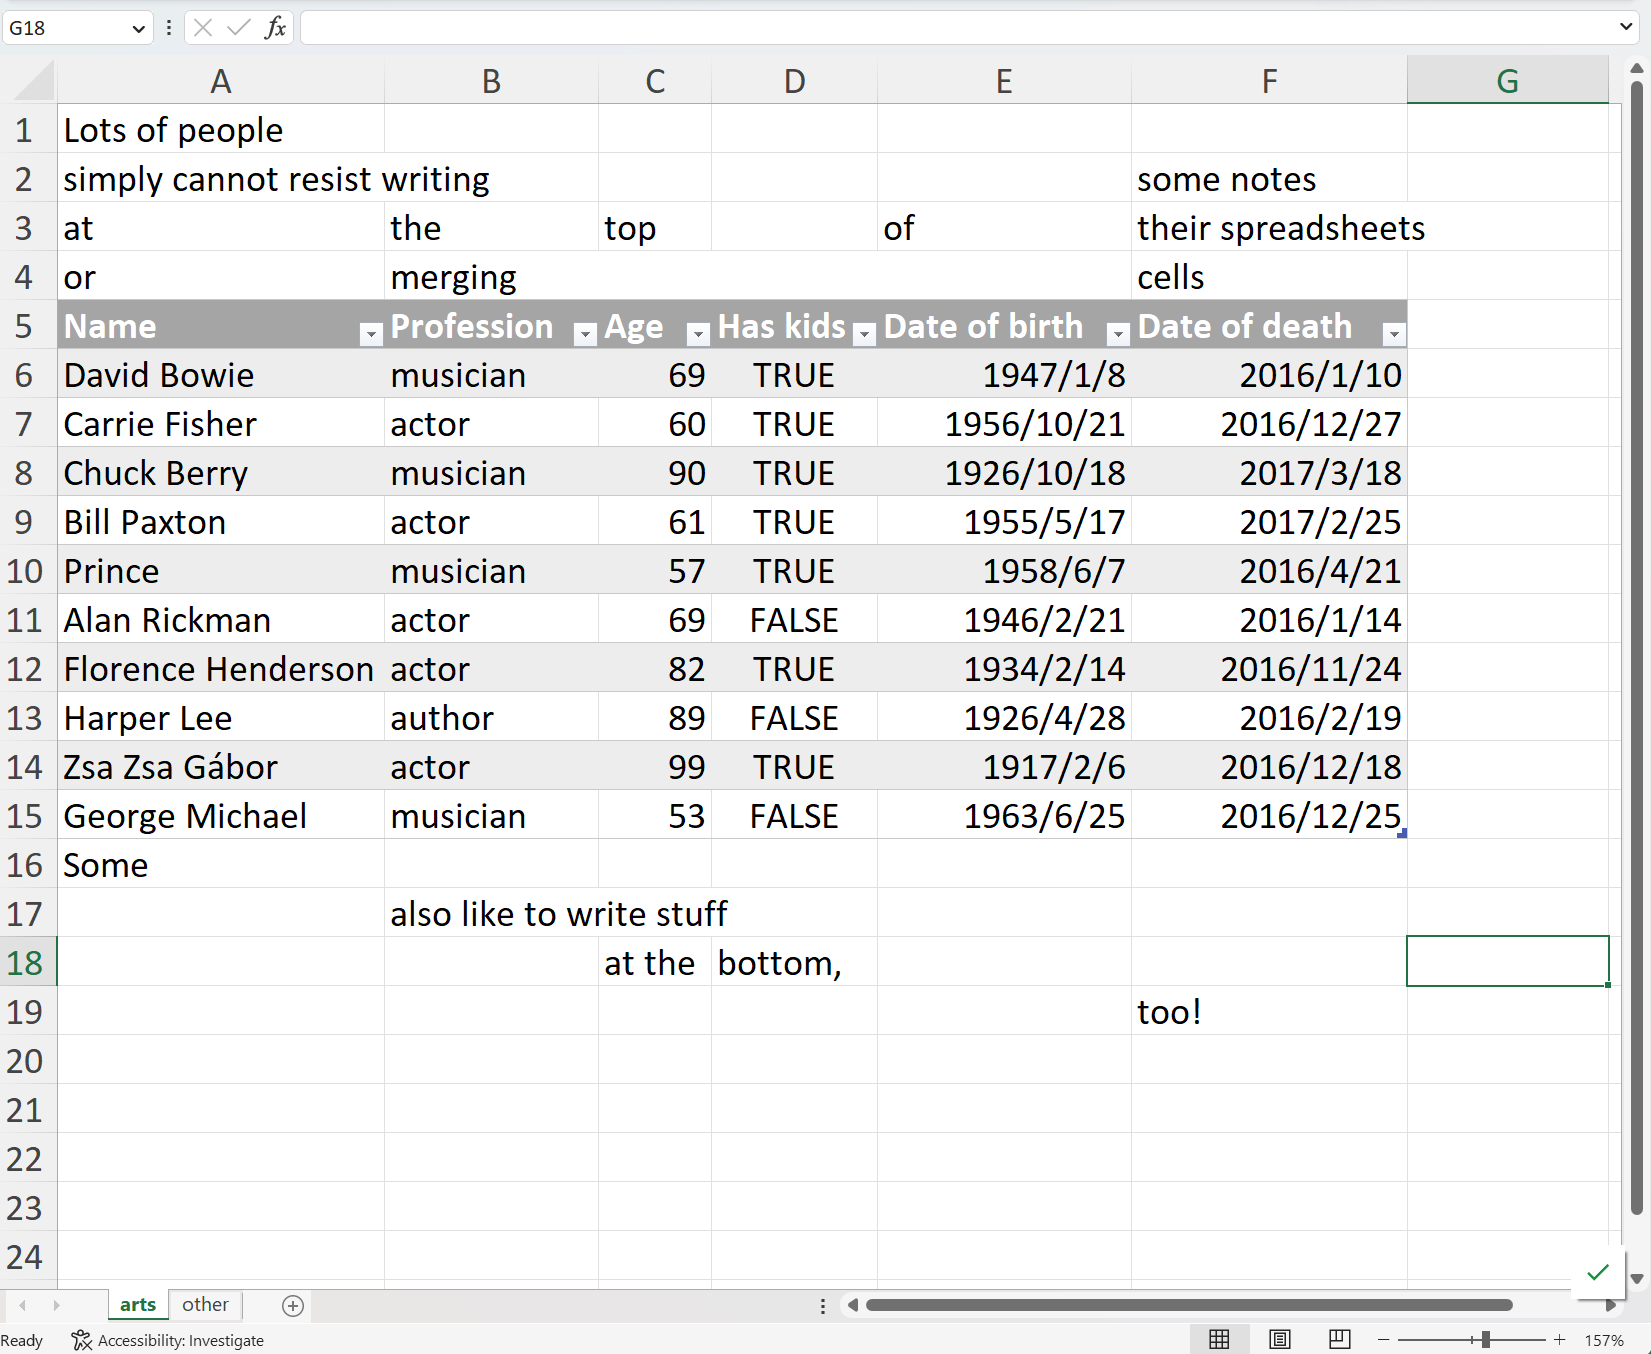


In `read_excel` function,
- `skip = k` will skip the first `k` rows.
- `n_max = n` will take at most `n` rows.
- `range = "A6:C9"` will read cells from `A6` to `C9`.
- `range = cell_rows(c(a, b))` will read rows from `a` to `b`.
- `range = cell_cols(c(a, b))` will read columns from `a` to `b`.

In [9]:
read_excel(deaths_path, skip = 4, n_max = 10) # skip the first 4 rows and the fifth row turns into column names
read_excel(deaths_path, range = "A6:C9")
read_excel(deaths_path, range = cell_cols(c(2, 3))) # omit NA at first rows

Name               Profession Age Has kids Date of birth Date of death
1  David Bowie        musician   69   TRUE    1947-01-08    2016-01-10   
2  Carrie Fisher      actor      60   TRUE    1956-10-21    2016-12-27   
3  Chuck Berry        musician   90   TRUE    1926-10-18    2017-03-18   
4  Bill Paxton        actor      61   TRUE    1955-05-17    2017-02-25   
5  Prince             musician   57   TRUE    1958-06-07    2016-04-21   
6  Alan Rickman       actor      69  FALSE    1946-02-21    2016-01-14   
7  Florence Henderson actor      82   TRUE    1934-02-14    2016-11-24   
8  Harper Lee         author     89  FALSE    1926-04-28    2016-02-19   
9  Zsa Zsa Gábor      actor      99   TRUE    1917-02-06    2016-12-18   
10 George Michael     musician   53  FALSE    1963-06-25    2016-12-25

David Bowie   musician 69
1 Carrie Fisher actor    60
2 Chuck Berry   musician 90
3 Bill Paxton   actor    61

the                      top   
1  merging                  NA    
2  Profession               Age   
3  musician                 69    
4  actor                    60    
5  musician                 90    
6  actor                    61    
7  musician                 57    
8  actor                    69    
9  actor                    82    
10 author                   89    
11 actor                    99    
12 musician                 53    
13 NA                       NA    
14 also like to write stuff NA    
15 NA                       at the

You may have noticed that, there are different data types in the spreadsheet. In `csv` file, all values are string. In Excel files, a cell can be one of five things:
- A boolean, like TRUE, FALSE, or NA
- A number, like “10” or “10.5”
- A datetime, which can also include time like “11/1/21” or “11/1/21 3:00 PM”
- A text string, like “ten”


##### Some other importing data methods:
The `readr` package in `tidyverse` is used for importing datasets:
- `read_csv()`: comma-separated values (CSV)
- `read_tsv()`: tab-separated values (TSV)
- `read_csv2()`: semicolon-separated values with , as the decimal mark
- `read_delim()`: delimited files (CSV and TSV are important special cases)
- `read_fwf()`: fixed-width files
- `read_table()`: whitespace-separated files
- `read_log()`: web log files

### Writing to Excel

In [10]:
install.packages('writexl')
library(writexl)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [11]:
deaths = read_excel(deaths_path, skip = 4, n_max = 10)
write_xlsx(deaths, path="deaths_cleaned.xlsx")

In [12]:
out <- read_xlsx("deaths_cleaned.xlsx")
all.equal(out, deaths)

[1] TRUE

### Google Sheets

In [13]:
install.packages("googlesheets4")
library(googlesheets4)
gs4_deauth() # Call `gs4_deauth()` to prevent the attempt to get credentials.
# gs4_auth(email = "mine@example.com") # get credentials to access restricted file.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



`read_sheet()` reads a Google Sheet from a URL or file id. This function is equivalent to `range_read()`

In [15]:
penguins <- read_sheet("https://docs.google.com/spreadsheets/d/1aFu8lnD_g0yjF5O-K6SFgSEWiHPpgvFCF0NY9D6LXnY/edit?usp=sharing")
penguins2 <- read_sheet("1aFu8lnD_g0yjF5O-K6SFgSEWiHPpgvFCF0NY9D6LXnY")
all.equal(penguins, penguins2)
head(penguins)

✔ Reading from penguins.

✔ Range Torgersen Island.

✔ Reading from penguins.

✔ Range Torgersen Island.



[1] TRUE

species island    bill_length_mm bill_depth_mm flipper_length_mm body_mass_g
1 Adelie  Torgersen 39.1           18.7          181               3750       
2 Adelie  Torgersen 39.5           17.4          186               3800       
3 Adelie  Torgersen 40.3           18            195               3250       
4 Adelie  Torgersen NA             NA            NA                NA         
5 Adelie  Torgersen 36.7           19.3          193               3450       
6 Adelie  Torgersen 39.3           20.6          190               3650       
  sex    year
1 male   2007
2 female 2007
3 female 2007
4 NA     2007
5 female 2007
6 male   2007

In [16]:
head(range_read("1aFu8lnD_g0yjF5O-K6SFgSEWiHPpgvFCF0NY9D6LXnY"))

✔ Reading from penguins.

✔ Range Torgersen Island.



species island    bill_length_mm bill_depth_mm flipper_length_mm body_mass_g
1 Adelie  Torgersen 39.1           18.7          181               3750       
2 Adelie  Torgersen 39.5           17.4          186               3800       
3 Adelie  Torgersen 40.3           18            195               3250       
4 Adelie  Torgersen NA             NA            NA                NA         
5 Adelie  Torgersen 36.7           19.3          193               3450       
6 Adelie  Torgersen 39.3           20.6          190               3650       
  sex    year
1 male   2007
2 female 2007
3 female 2007
4 NA     2007
5 female 2007
6 male   2007

To get a quick view of the meta data of the sheet, use `gs4_get()`

In [17]:
gs4_get("1aFu8lnD_g0yjF5O-K6SFgSEWiHPpgvFCF0NY9D6LXnY")

── <googlesheets4_spreadsheet> ─────────────────────────────────────────────────
Spreadsheet name: penguins                                    
              ID: 1aFu8lnD_g0yjF5O-K6SFgSEWiHPpgvFCF0NY9D6LXnY
          Locale: en_US                                       
       Time zone: America/New_York                            
     # of sheets: 3                                           

── <sheets> ────────────────────────────────────────────────────────────────────
    (Sheet name): (Nominal extent in rows x columns)
Torgersen Island: 1000 x 26
   Biscoe Island: 1000 x 26
    Dream Island: 1000 x 26

You can obtain a list of all sheets within a Google Sheet with `sheet_names()`.

In [18]:
sheet_names("1aFu8lnD_g0yjF5O-K6SFgSEWiHPpgvFCF0NY9D6LXnY")

[1] "Torgersen Island" "Biscoe Island"    "Dream Island"

Use `sheet` arguement in `read_sheet()` to read different worksheets.

In [19]:
head(read_sheet("1aFu8lnD_g0yjF5O-K6SFgSEWiHPpgvFCF0NY9D6LXnY", sheet="Biscoe Island"))

✔ Reading from penguins.

✔ Range ''Biscoe Island''.



species island bill_length_mm bill_depth_mm flipper_length_mm body_mass_g
1 Adelie  Biscoe 37.8           18.3          174               3400       
2 Adelie  Biscoe 37.7           18.7          180               3600       
3 Adelie  Biscoe 35.9           19.2          189               3800       
4 Adelie  Biscoe 38.2           18.1          185               3950       
5 Adelie  Biscoe 38.8           17.2          180               3800       
6 Adelie  Biscoe 35.3           18.9          187               3800       
  sex    year
1 female 2007
2 male   2007
3 female 2007
4 male   2007
5 male   2007
6 female 2007

## Scraping

**web scraping**: the practice of collecting data from internet pages



*   On the internet, data is usually organized in a simple and clean way for readers.
*   Weather charts, financial tables, and calendar schedules are all organized in a visually pleasing way because no one wants to download and Excel spreadsheet just to see what the data says.
*   However, this means you may need to create the physical dataset yourself.





## HTML

HTML = **H**yper**T**ext **M**arkup **L**anguage



*   When you visit a webpage, what you're really doing is communicating with a server that you want to see the files that make up a webpage.
*   Visiting a web page sends a request to the server to send your computer the files so that you can view the website.
*   HTML files effectively writes out in code everything that you're observing on a webpage.



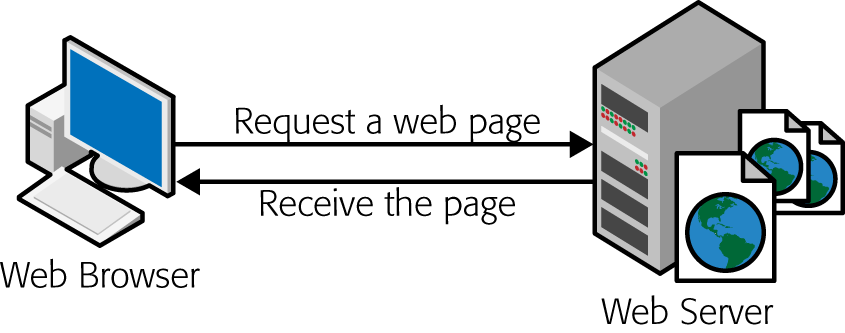

(Source: O'Reilly https://www.oreilly.com/library/view/wordpress-the-missing/9781449359867/ch01.html)

Because webpages have an incredible treasure trove of information, it is only natural that we want to create datasets using all of it.

But what does HTML look like?

Luckily, we can find out! Google Colab markdown supports HTML. Consider the HTML code in the image below. Running that code in a markdown window showcases what the HTML renders in a page (I changed myimg.png to be a heart in the spirit of Valentine's Day for this lab).

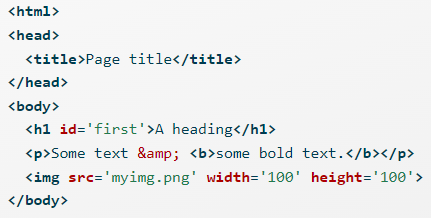


<html>
<head>
  <title>Page title</title>
</head>
<body>
  <h1 id='first'>A heading</h1>
  <p>Some text &amp; <b>some bold text.</b></p>
  <img src='https://i.etsystatic.com/5709149/r/il/68e42b/3618878629/il_1140xN.3618878629_ozz5.jpg' width='100' height='100'>
</body>



HTML consists of:



1.   Elements (denoted in <> and </> tags)
2.   Attributes (variables set within elements)
3.   Contents (anything in between opening and closing tags)



## Reading in HTML

Now that we know what HTML looks like and their basic components, how do we read in HTML from the internet? Lets examine a page from the rvest tidyverse documnetation page.

In [20]:
html <- read_html("http://rvest.tidyverse.org/")
html

{html_document}
<html lang="en">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body>\n    <a href="#container" class="visually-hidden-focusable">Skip t ...

**Note**: There are over 100 tags in HTML that each serve a unique purpose. If you see a tag you have not seen before, google it and see what it does! It is not worth memorizing for this class but could be useful in order to understand how information gets organized on webpages!

You can even make your own minimal HTML inline!

In [21]:
html <- minimal_html("
  <h1>This is a heading</h1>
  <p id='first'>This is a paragraph</p>
  <p class='important'>This is an important paragraph</p>
")
html

{html_document}
<html>
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body>\n<h1>This is a heading</h1>\n  <p id="first">This is a paragraph</ ...

## Extracting Data

The super structured organization of HTML means that finding information from elements is an easy task to do! This is what `html_elements` accomplishes.

HTML works in tandem with **C**ascading **S**tyle **S**heets (CSS) to style a webpage in a particular way. To extract data out of HTML, we use CSS selectors. They come with 3 common prefixes.



1.   "": If there is no prefix to the element name, we just want any tags with the name of the elemnent.
2.   ".": If the prefix is a period, we are looking for all class attributes with the name that follows.
3.   "#" If the prefix is a pound symbol, we are looking for all id attributes with the name that follows.

Let's use the minimal HTML example from above to showcase how these CSS selectors work.

In [22]:
html |> html_elements("p")

{xml_nodeset (2)}
[1] <p id="first">This is a paragraph</p>
[2] <p class="important">This is an important paragraph</p>

In [23]:
html |> html_elements(".important")

{xml_nodeset (1)}
[1] <p class="important">This is an important paragraph</p>

In [24]:
html |> html_elements("#first")

{xml_nodeset (1)}
[1] <p id="first">This is a paragraph</p>

Notice that `html_elements` returns the occurrences of every element in the HTML file that satisfies the element name, class name, or id name (respectively in the examples above).

Another important function we will now introduce is... `html_element`. Seems like deja vu doesn't it? Worthy of note that this function is not the same as its plural name counterpart `html_elements`.

In most cases, you use these in tandem. Let's explore this using a minimal Star Wars minimal HTML snippet.


In [25]:
html <- minimal_html("
  <ul>
    <li><b>C-3PO</b> is a <i>droid</i> that weighs <span class='weight'>167 kg</span></li>
    <li><b>R2-D2</b> is a <i>droid</i> that weighs <span class='weight'>96 kg</span></li>
    <li><b>Yoda</b> weighs <span class='weight'>66 kg</span></li>
    <li><b>R4-P17</b> is a <i>droid</i></li>
  </ul>
  ")

The above minimal html would look like this:

  <ul>
    <li><b>C-3PO</b> is a <i>droid</i> that weighs <span class='weight'>167 kg</span></li>
    <li><b>R2-D2</b> is a <i>droid</i> that weighs <span class='weight'>96 kg</span></li>
    <li><b>Yoda</b> weighs <span class='weight'>66 kg</span></li>
    <li><b>R4-P17</b> is a <i>droid</i></li>
  </ul>

We may wish to extract relevant information from this neatly organized HTML with one piece of information per character. However, as we can see, not every character has the same information included.

Let's start first by extracting every bullet point. Which function and element should we use?

In [26]:
# I have enclosed this line in parentheses so that it assigns the output to "character" AND prints out the contents.
(characters <- html |> html_elements("li"))

{xml_nodeset (4)}
[1] <li>\n<b>C-3PO</b> is a <i>droid</i> that weighs <span class="weight">167 ...
[2] <li>\n<b>R2-D2</b> is a <i>droid</i> that weighs <span class="weight">96  ...
[3] <li>\n<b>Yoda</b> weighs <span class="weight">66 kg</span>\n</li>
[4] <li>\n<b>R4-P17</b> is a <i>droid</i>\n</li>

Now that we have our bullet list information, we can try to extract information like the name of the character and the characters' respective weights. This is the part where `html_element` shines.

Notice that the output of html_elements so far has not been pure HTML, but rather something called an "xml_nodeset". These nodes by definition are just organized blocks of information. What `html_element` does is take a nodeset as input and output the same number of outputs so **you can tell what information corresponds to which element in the input nodeset**.

Let's revisit the character nodeset we created above to see what we mean by this.

In [27]:
characters |> html_element("b")

{xml_nodeset (4)}
[1] <b>C-3PO</b>
[2] <b>R2-D2</b>
[3] <b>Yoda</b>
[4] <b>R4-P17</b>

We can see that when we start with the characters in the pipeline and ask to get the first instance of the \<b\> element in each node of the nodeset, we get the names of each character that were in bold (hence the \<b\> tag) as the output.

Emphasis should be placed on the fact that html_element returns the FIRST occurrence of the element we are looking for. To see this, take the next example which is the same as the previous except for the fact that the first "weights" is in bold. Notice how \<b\>weighs\</b\> does not show up.

In [28]:
html <- minimal_html("
  <ul>
    <li><b>C-3PO</b> is a <i>droid</i> that <b>weighs</b> <span class='weight'>167 kg</span></li>
    <li><b>R2-D2</b> is a <i>droid</i> that weighs <span class='weight'>96 kg</span></li>
    <li><b>Yoda</b> weighs <span class='weight'>66 kg</span></li>
    <li><b>R4-P17</b> is a <i>droid</i></li>
  </ul>
")

html |> html_elements("li") |> html_element("b")

{xml_nodeset (4)}
[1] <b>C-3PO</b>
[2] <b>R2-D2</b>
[3] <b>Yoda</b>
[4] <b>R4-P17</b>

Be careful not to confuse the 2 functions `html_elements` and `html_element`. Observe what happens if you use the latter when you meant the former (the former is what we originally used for the characters variable). This happens because it only showcases the elements in the first "li" element!!

In [29]:
(characters <- html |> html_element("li"))

{html_node}
<li>
[1] <b>C-3PO</b>
[2] <i>droid</i>
[3] <b>weighs</b>
[4] <span class="weight">167 kg</span>

# Extracting Text and Attrbiutes

We can also extract text and attributes from HTML data. Consider the following example where we will try to extract the animal names ('cats' and 'dogs') and the wikipedia pages associated with each one (the href attribute).

In [30]:
html <- minimal_html("
  <p><a href='https://en.wikipedia.org/wiki/Cat'>cats</a></p>
  <p><a href='https://en.wikipedia.org/wiki/Dog'>dogs</a></p>
")



In [31]:
html |> html_elements("p") |> html_text2()

[1] "cats" "dogs"

In [32]:
html |> html_elements("p") |> html_element("a") |> html_attr("href")

[1] "https://en.wikipedia.org/wiki/Cat" "https://en.wikipedia.org/wiki/Dog"

# Working with Tables

HTML can support displaying tables on the internet which is useful for us data scientists who work with tabular data. The table below is what the HTML would look like on a website (or even as markdown in Google Colab).

  <table class='mytable'>
    <tr><th>x</th>   <th>y</th></tr>
    <tr><td>1.5</td> <td>2.7</td></tr>
    <tr><td>4.9</td> <td>1.3</td></tr>
    <tr><td>7.2</td> <td>8.1</td></tr>
  </table>

In [33]:
html <- minimal_html("
  <table class='mytable'>
    <tr><th>x</th>   <th>y</th></tr>
    <tr><td>1.5</td> <td>2.7</td></tr>
    <tr><td>4.9</td> <td>1.3</td></tr>
    <tr><td>7.2</td> <td>8.1</td></tr>
  </table>
  ")

To extract the table and save it as a tibble in R, we can use the `html_table` function.

In [34]:
html |>
  html_element(".mytable") |>
  html_table()

x   y  
1 1.5 2.7
2 4.9 1.3
3 7.2 8.1

**Note**: For the advanced, rvest can only handle raw HTML and not webpages that are generated dynamically with Javascript. You would need to use the `chromote` package to make that work.

### Exercise 1
Read the Google Sheet titled survey from [link](https://docs.google.com/spreadsheets/d/1yc5gL-a2OOBr8M7B3IsDNX5uR17vBHOyWZq6xSTG2G8/edit#gid=0), with `survey_id` as a character variable and `n_pets` as a numerical variable.

*Hint*: [Column Specification](https://googlesheets4.tidyverse.org/reference/range_read.html#column-specification)

### Answer to Exercise 1

In [35]:
gs4_get("1yc5gL-a2OOBr8M7B3IsDNX5uR17vBHOyWZq6xSTG2G8")
read_sheet("1yc5gL-a2OOBr8M7B3IsDNX5uR17vBHOyWZq6xSTG2G8", col_types = "cd")

── <googlesheets4_spreadsheet> ─────────────────────────────────────────────────
Spreadsheet name: survey                                      
              ID: 1yc5gL-a2OOBr8M7B3IsDNX5uR17vBHOyWZq6xSTG2G8
          Locale: en_US                                       
       Time zone: America/New_York                            
     # of sheets: 1                                           

── <sheets> ────────────────────────────────────────────────────────────────────
(Sheet name): (Nominal extent in rows x columns)
      Sheet1: 7 x 2

✔ Reading from survey.

✔ Range Sheet1.

Warning message in .Primitive("as.double")(x, ...):
“NAs introduced by coercion”
Warning message in .Primitive("as.double")(x, ...):
“NAs introduced by coercion”


survey_id n_pets
1 1          0    
2 2          1    
3 3         NA    
4 4         NA    
5 5          2    
6 6         NA

### Exercise 2
Read the first 6 rows (including column names) from third to fifth columns in worksheet `Dream Island` in Google Sheet file `penguins` using `read_sheet()` with `file_id`: `1aFu8lnD_g0yjF5O-K6SFgSEWiHPpgvFCF0NY9D6LXnY`.

### Answer to Exercise 2

In [36]:
read_sheet("1aFu8lnD_g0yjF5O-K6SFgSEWiHPpgvFCF0NY9D6LXnY", range="Dream Island!C1:E6")

✔ Reading from penguins.

✔ Range ''Dream Island'!C1:E6'.



bill_length_mm bill_depth_mm flipper_length_mm
1 39.5           16.7          178              
2 37.2           18.1          178              
3 39.5           17.8          188              
4 40.9           18.9          184              
5 36.4           17.0          195

## Examples on Real HTML Data

### Exercise 3

Using this IMDB chart "https://web.archive.org/web/20220201012049/https://www.imdb.com/chart/top/" create a table with all the relevant information. You can leave the columns that missing information. The goal is just to get a tibble.

### Answer to Exercise 3

In [37]:
url <- "https://web.archive.org/web/20220201012049/https://www.imdb.com/chart/top/"
html <- read_html(url)

table <- html |>
  html_element("table") |>
  html_table()
table

1   NA
2   NA
3   NA
4   NA
5   NA
6   NA
7   NA
8   NA
9   NA
10  NA
11  NA
12  NA
13  NA
14  NA
15  NA
16  NA
17  NA
18  NA
19  NA
20  NA
21  NA
22  NA
23  NA
24  NA
25  NA
26  NA
27  NA
28  NA
29  NA
30  NA
⋮   ⋮ 
221 NA
222 NA
223 NA
224 NA
225 NA
226 NA
227 NA
228 NA
229 NA
230 NA
231 NA
232 NA
233 NA
234 NA
235 NA
236 NA
237 NA
238 NA
239 NA
240 NA
241 NA
242 NA
243 NA
244 NA
245 NA
246 NA
247 NA
248 NA
249 NA
250 NA
    Rank & Title                                                                
1   1.\n      The Shawshank Redemption\n        (1994)                          
2   2.\n      The Godfather\n        (1972)                                     
3   3.\n      The Godfather: Part II\n        (1974)                            
4   4.\n      The Dark Knight\n        (2008)                                   
5   5.\n      12 Angry Men\n        (1957)                                      
6   6.\n      Schindler's List\n        (1993)                                  
7   7.\n      The Lord of the Rings: The Return of the King\n        (2003)     
8   8.\n      Pulp Fiction\n        (1994)                                      
9   9.\n      The Good, the Bad and the Ugly\n        (1966)                    
10  10.\n      The Lord of the Rings: The Fellowship of the Ring\n        (2001)
11  11.\n      Fight Club\n        (1999)                                       
12  12.\n      Forrest Gump\n        (1994)                                     
13  13.\n      Inception\n        (2010)                                        
14  14.\n      The Lord of the Rings: The Two Towers\n        (2002)            
15  15.\n      Star Wars: Episode V - The Empire Strikes Back\n        (1980)   
16  16.\n      The Matrix\n        (1999)                                       
17  17.\n      Goodfellas\n        (1990)                                       
18  18.\n      One Flew Over the Cuckoo's Nest\n        (1975)                  
19  19.\n      Seven Samurai\n        (1954)                                    
20  20.\n      Se7en\n        (1995)                                            
21  21.\n      The Silence of the Lambs\n        (1991)                         
22  22.\n      City of God\n        (2002)                                      
23  23.\n      It's a Wonderful Life\n        (1946)                            
24  24.\n      Life Is Beautiful\n        (1997)                                
25  25.\n      Spider-Man: No Way Home\n        (2021)                          
26  26.\n      Saving Private Ryan\n        (1998)                              
27  27.\n      Star Wars: Episode IV - A New Hope\n        (1977)               
28  28.\n      Interstellar\n        (2014)                                     
29  29.\n      Spirited Away\n        (2001)                                    
30  30.\n      The Green Mile\n        (1999)                                   
⋮   ⋮                                                                           
221 221.\n      Logan\n        (2017)                                           
222 222.\n      A Silent Voice: The Movie\n        (2016)                       
223 223.\n      La Haine\n        (1995)                                        
224 224.\n      Hachi: A Dog's Tale\n        (2009)                             
225 225.\n      Cool Hand Luke\n        (1967)                                  
226 226.\n      Gangs of Wasseypur\n        (2012)                              
227 227.\n      The 400 Blows\n        (1959)                                   
228 228.\n      Platoon\n        (1986)                                         
229 229.\n      Spotlight\n        (2015)                                       
230 230.\n      Monsters, Inc.\n        (2001)                                  
231 231.\n      Rebecca\n        (1940)                                         
232 232.\n      Life of Brian\n        (1979)                                   
233 233.\

### Exercise 4

Without first loading the data into a tibble, extract the ratings based on the number of user ratings from the HTML file.

### Answer to Exercise 4

In [38]:
html |>
  html_elements("td strong") |>
  html_attr("title")

[1] "9.2 based on 2,536,415 user ratings"
  [2] "9.1 based on 1,745,675 user ratings"
  [3] "9.0 based on 1,211,032 user ratings"
  [4] "9.0 based on 2,486,931 user ratings"
  [5] "8.9 based on 749,563 user ratings"  
  [6] "8.9 based on 1,295,705 user ratings"
  [7] "8.9 based on 1,749,722 user ratings"
  [8] "8.8 based on 1,952,864 user ratings"
  [9] "8.8 based on 732,557 user ratings"  
 [10] "8.8 based on 1,771,245 user ratings"
 [11] "8.7 based on 1,996,110 user ratings"
 [12] "8.7 based on 1,957,544 user ratings"
 [13] "8.7 based on 2,228,642 user ratings"
 [14] "8.7 based on 1,580,899 user ratings"
 [15] "8.7 based on 1,230,892 user ratings"
 [16] "8.7 based on 1,830,919 user ratings"
 [17] "8.6 based on 1,096,894 user ratings"
 [18] "8.6 based on 970,948 user ratings"  
 [19] "8.6 based on 334,944 user ratings"  
 [20] "8.6 based on 1,556,144 user ratings"
 [21] "8.6 based on 1,363,287 user ratings"
 [22] "8.6 based on 733,264 user ratings"  
 [23] "8.6 based on 438,951 user ratings"  
 [24] "8.6 based on 666,605 user ratings"  
 [25] "8.6 based on 432,286 user ratings"  
 [26] "8.6 based on 1,323,820 user ratings"
 [27] "8.5 based on 1,302,369 user ratings"
 [28] "8.5 based on 1,681,995 user ratings"
 [29] "8.5 based on 715,672 user ratings"  
 [30] "8.5 based on 1,234,090 user ratings"
 [31] "8.5 based on 712,448 user ratings"  
 [32] "8.5 based on 1,108,188 user ratings"
 [33] "8.5 based on 51,931 user ratings"   
 [34] "8.5 based on 790,771 user ratings"  
 [35] "8.5 based on 1,053,728 user ratings"
 [36] "8.5 based on 1,140,698 user ratings"
 [37] "8.5 based on 1,047,652 user ratings"
 [38] "8.5 based on 644,147 user ratings"  
 [39] "8.5 based on 1,006,734 user ratings"
 [40] "8.5 based on 233,625 user ratings"  
 [41] "8.5 based on 260,547 user ratings"  
 [42] "8.5 based on 1,084,181 user ratings"
 [43] "8.5 based on 788,463 user ratings"  
 [44] "8.5 based on 1,431,474 user ratings"
 [45] "8.5 based on 179,321 user ratings"  
 [46] "8.5 based on 1,266,998 user ratings"
 [47] "8.5 based on 817,319 user ratings"  
 [48] "8.5 based on 1,273,524 user ratings"
 [49] "8.4 based on 552,614 user ratings"  
 [50] "8.4 based on 319,732 user ratings"  
 [51] "8.4 based on 474,492 user ratings"  
 [52] "8.4 based on 250,817 user ratings"  
 [53] "8.4 based on 841,202 user ratings"  
 [54] "8.4 based on 642,211 user ratings"  
 [55] "8.4 based on 1,191,224 user ratings"
 [56] "8.4 based on 932,634 user ratings"  
 [57] "8.4 based on 217,246 user ratings"  
 [58] "8.4 based on 1,466,464 user ratings"
 [59] "8.4 based on 378,992 user ratings"  
 [60] "8.4 based on 190,672 user ratings"  
 [61] "8.4 based on 214,880 user ratings"  
 [62] "8.4 based on 1,066,004 user ratings"
 [63] "8.4 based on 975,508 user ratings"  
 [64] "8.4 based on 119,927 user ratings"  
 [65] "8.4 based on 466,734 user ratings"  
 [66] "8.4 based on 968,398 user ratings"  
 [67] "8.4 based on 474,688 user ratings"  
 [68] "8.3 based on 374,677 user ratings"  
 [69] "8.3 based on 553,426 user ratings"  
 [70] "8.3 based on 1,136,562 user ratings"
 [71] "8.3 based on 239,205 user ratings"  
 [72] "8.3 based on 458,597 user ratings"  
 [73] "8.3 based on 1,613,428 user ratings"
 [74] "8.3 based on 691,108 user ratings"  
 [75] "8.3 based on 337,473 user ratings"  
 [76] "8.3 based on 1,005,677 user ratings"
 [77] "8.3 based on 81,165 user ratings"   
 [78] "8.3 based on 244,486 user ratings"  
 [79] "8.3 based on 41,453 user ratings"   
 [80] "8.3 based on 377,496 user ratings"  
 [81] "8.3 based on 947,809 user ratings"  
 [82] "8.3 based on 388,750 user ratings"  
 [83] "8.3 based on 1,120,594 user ratings"
 [84] "8.3 based on 1,004,883 user ratings"
 [85] "8.3 based on 1,368,392 user ratings"
 [86] "8.3 based on 922,275 user ratings"  
 [87] "8.3 based on 81,907 user ratings"   
 [88] "8.3 based on 1,006,169 user ratings"
 [89] "8.3 based on 71,711 user ratings"   
 [90] "8.3 based on 642,698 user ratings"  
 [91] "8.3 based on 976,830 user ratings" 